## Business understanding
The goal of this project is to predict Seattle weather conditions using historical data, benefiting various stakeholders. Accurate forecasts help businesses plan better, farmers optimize crop schedules, and transportation services ensure safety and efficiency. Public safety is also enhanced through timely weather warnings. By leveraging machine learning models on data such as precipitation, temperature, and wind speed, we aim to provide precise weather predictions, driving informed decision-making and operational efficiency.

## Setting up environment and importing libraries 

In [1]:
#setting up the envirnment 
import os

#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing data 

In [3]:
df=pd.read_csv('seattle-weather.csv')
df.head(10)


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [4]:
#display head and tail of dataframe

df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Data understanding

In [5]:
# check shape of the data
df.shape

(1461, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
# Descriptive analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


<BarContainer object of 5 artists>

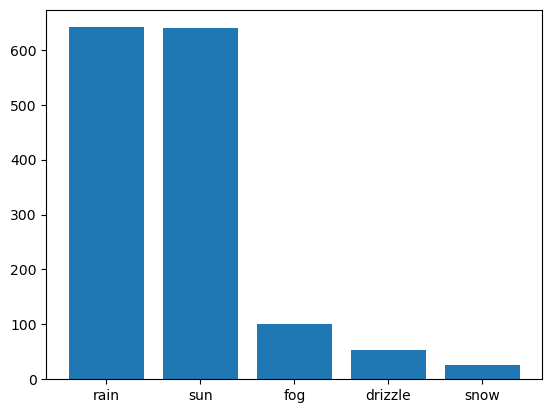

In [8]:
# Plotting all labels of the taret variable "weather"

dis=df['weather'].value_counts()
plt.bar(dis.index,dis.values)

## Data cleaning 

In [5]:
#Checking if there is any missing values

df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

**No missing values were found**

In [6]:
#Checking if there is any duplicate records

df.duplicated().sum()

0

**No duplicate records were found**

In [11]:
# we have to convert datatype of "date" variable to date datatype. 
df['date']=pd.to_datetime(df['date'])

## Exploratory Data Analysis 

Feature - date


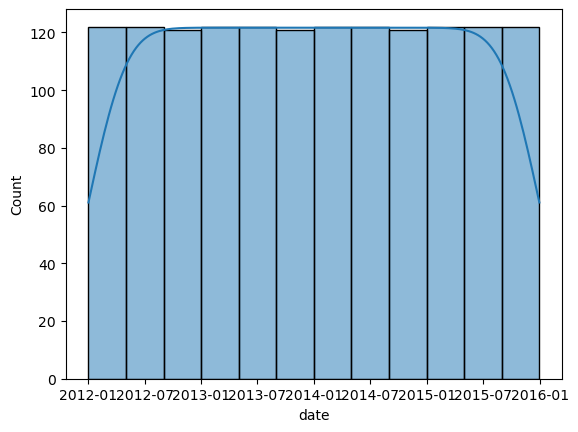

Feature - precipitation


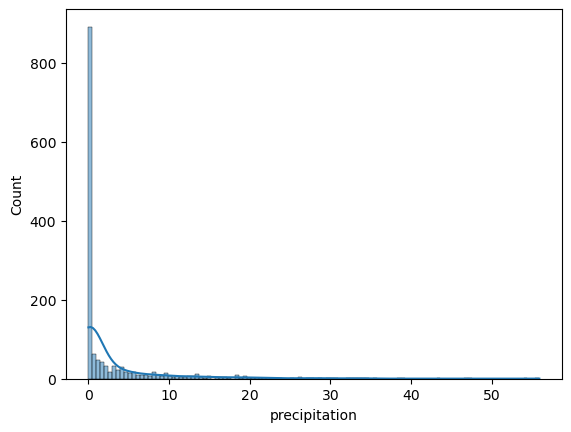

Feature - temp_max


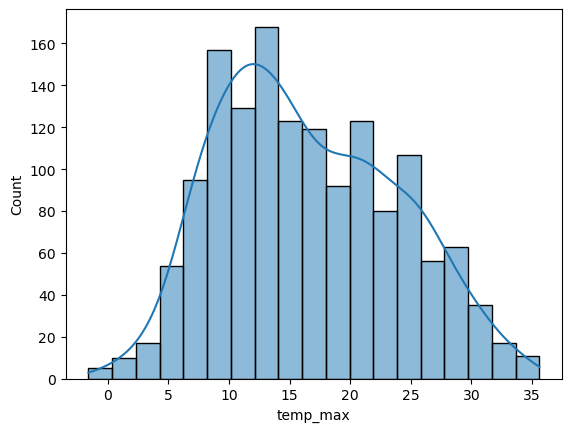

Feature - temp_min


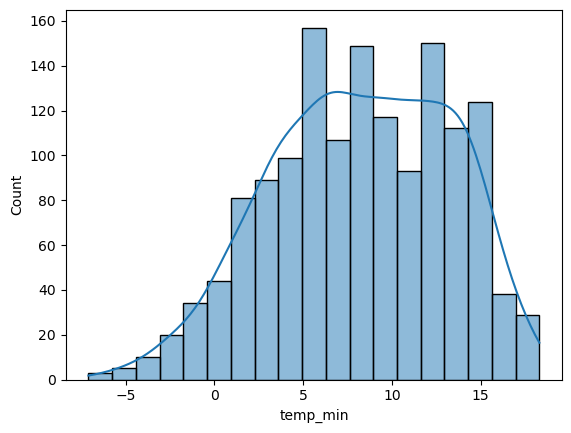

Feature - wind


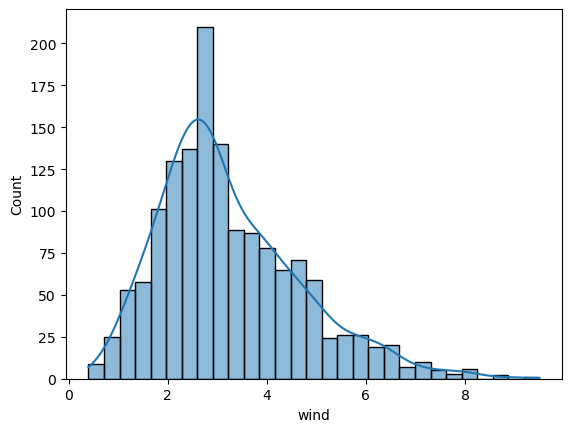

Feature - weather


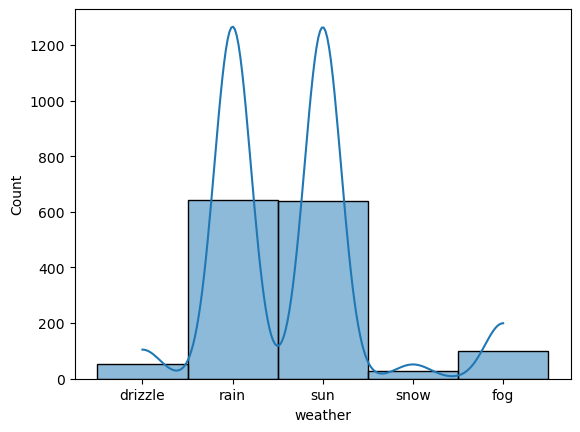

In [12]:
for column in df.columns:
    print(f"Feature - {column}")
    sns.histplot(data=df, x=column,kde=True)
    plt.show()

**We can see here that Seattle gets maximum amount of rainy and sunny weather than any other categories**

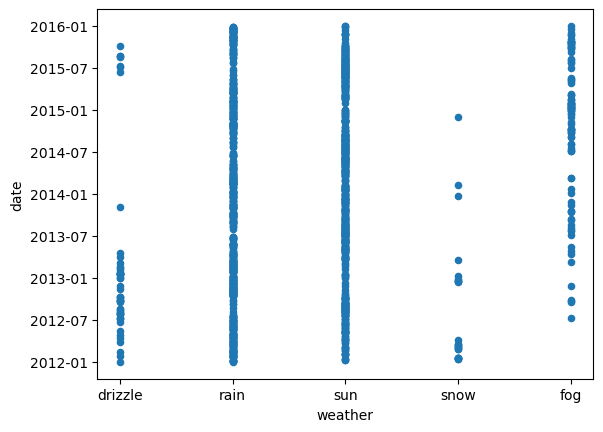

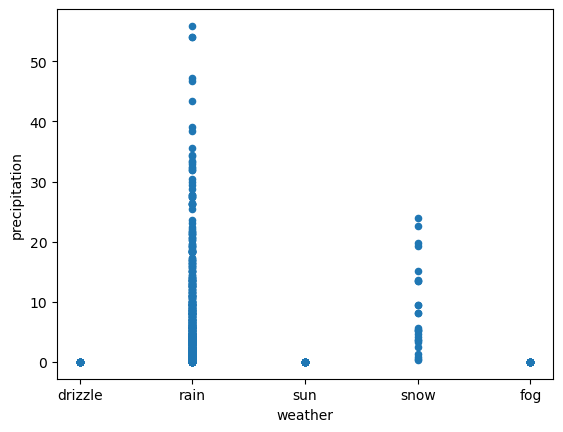

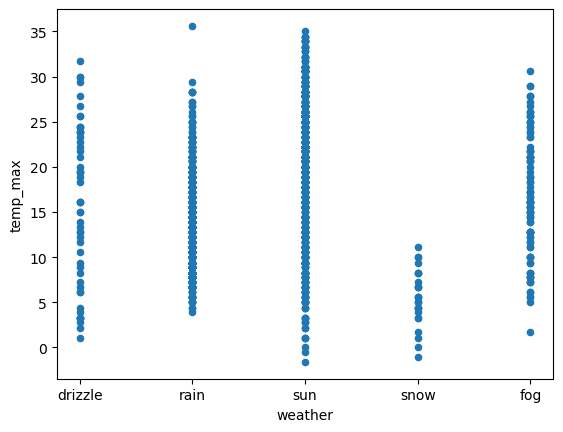

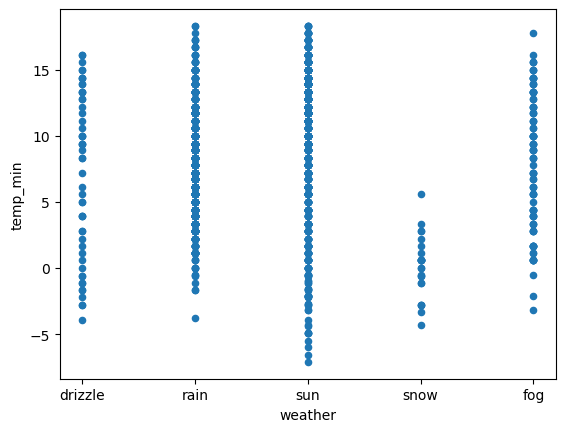

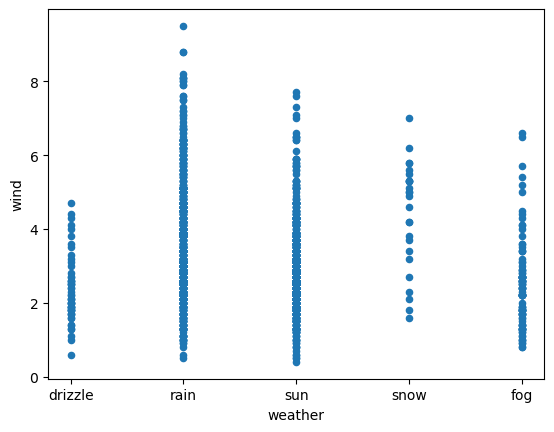

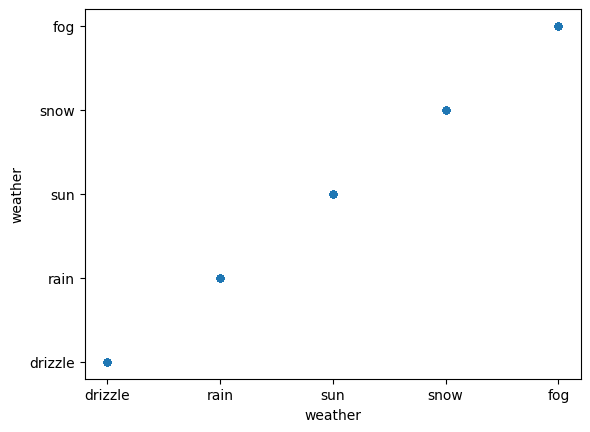

In [13]:
# Checking correation of target variable "weather" with other variables.

for column in df.columns:
    df.plot(kind="scatter", x="weather", y=column)
    plt.show()

**-We can conclude that precipitation is more during rainy and snowy weather.**<br>
**-Wind is the highest maximum during rainy weather.**<br>
**-Temperature fluctuates more during snowy conditions.**<br>

## Feature engineering

In [14]:
#copy dataset into new dtaframe 'data'

data = df.copy()
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
# Splitting date into day year month 

data['Day']=df['date'].dt.day
data['Month']=df['date'].dt.month
data['Year']=df['date'].dt.year

# drop date from the dataframe
data.drop('date',axis=1,inplace=True)
data.head()

,precipitation,temp_max,temp_min,wind,weather,Day,Month,Year
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,10.9,10.6,2.8,4.5,rain,2,1,2012
2,0.8,11.7,7.2,2.3,rain,3,1,2012
3,20.3,12.2,5.6,4.7,rain,4,1,2012
4,1.3,8.9,2.8,6.1,rain,5,1,2012


In [16]:
data['Year'].value_counts()

Year
2012    366
2013    365
2014    365
2015    365
Name: count, dtype: int64

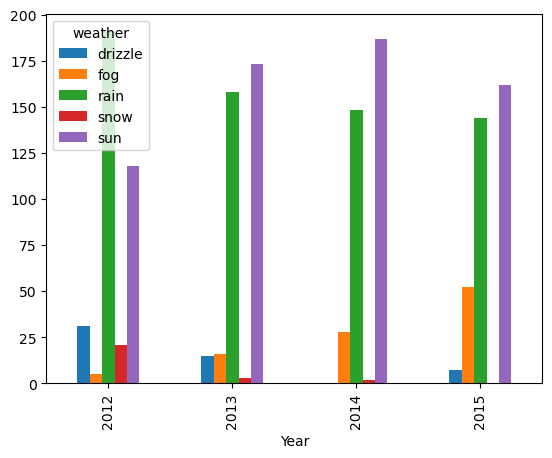

In [17]:
# Group the dataframe by 'Year' and count the values in 'weather'
grouped = data.groupby('Year')['weather'].value_counts()

# Plot the grouped data as a bar chart
grouped.unstack().plot(kind='bar')
plt.show()

**2012 had highest rain and 2014 was the most sunny year.**

In [18]:
#check all unique values of month feature

data['Month'].value_counts()

Month
1     124
3     124
5     124
7     124
8     124
10    124
12    124
4     120
6     120
9     120
11    120
2     113
Name: count, dtype: int64

In [19]:
# Creating a new feature 'season' that encodes the 'date'datatype into four seasons
season_map = {1:'Winter',
              2:'Winter',
              3:'Spring',
              4:'Spring',
              5:'Spring',
              6:'Summer',
              7:'Summer',
              8:'Summer',
              9:'Fall',
              10:'Fall',
              11:'Fall',
              12:'Winter'
              }

data['season'] = data['Month'].map(season_map) 

# categorize the season values into four new 'season' features
data = pd.get_dummies(data, columns=['season'], dtype=float) 

data.head()

,precipitation,temp_max,temp_min,wind,weather,Day,Month,Year,season_Fall,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,drizzle,1,1,2012,0.0,0.0,0.0,1.0
1,10.9,10.6,2.8,4.5,rain,2,1,2012,0.0,0.0,0.0,1.0
2,0.8,11.7,7.2,2.3,rain,3,1,2012,0.0,0.0,0.0,1.0
3,20.3,12.2,5.6,4.7,rain,4,1,2012,0.0,0.0,0.0,1.0
4,1.3,8.9,2.8,6.1,rain,5,1,2012,0.0,0.0,0.0,1.0


In [20]:
data.drop(['Day','Month','Year'],axis=1,inplace=True)
data.head()

,precipitation,temp_max,temp_min,wind,weather,season_Fall,season_Spring,season_Summer,season_Winter
0,0.0,12.8,5.0,4.7,drizzle,0.0,0.0,0.0,1.0
1,10.9,10.6,2.8,4.5,rain,0.0,0.0,0.0,1.0
2,0.8,11.7,7.2,2.3,rain,0.0,0.0,0.0,1.0
3,20.3,12.2,5.6,4.7,rain,0.0,0.0,0.0,1.0
4,1.3,8.9,2.8,6.1,rain,0.0,0.0,0.0,1.0


In [21]:
# creates a new feature from the difference between max and min temperature
data['temp_range'] = data['temp_max'] - data['temp_min'] 

data.head()

,precipitation,temp_max,temp_min,wind,weather,season_Fall,season_Spring,season_Summer,season_Winter,temp_range
0,0.0,12.8,5.0,4.7,drizzle,0.0,0.0,0.0,1.0,7.8
1,10.9,10.6,2.8,4.5,rain,0.0,0.0,0.0,1.0,7.8
2,0.8,11.7,7.2,2.3,rain,0.0,0.0,0.0,1.0,4.5
3,20.3,12.2,5.6,4.7,rain,0.0,0.0,0.0,1.0,6.6
4,1.3,8.9,2.8,6.1,rain,0.0,0.0,0.0,1.0,6.1


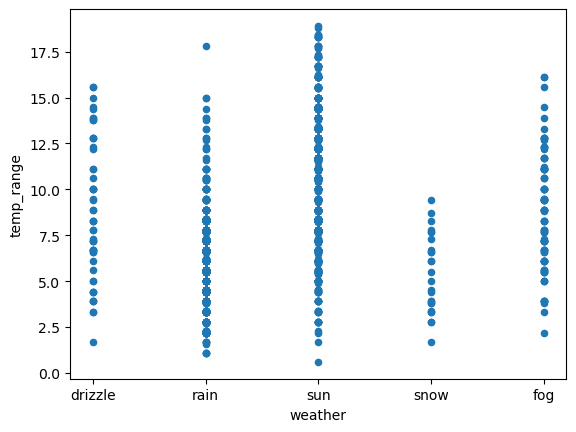

In [22]:
data.plot(kind="scatter", x="weather", y="temp_range")
plt.show()

## Label encoding of target feature

In [23]:
# creates a new feature that encodes the five weather strings into numeric categories

le = LabelEncoder()
data['weather_label']=le.fit_transform(data['weather']) 

# Drop weather variable
data.drop('weather',axis=1, inplace=True)
data.head()

,precipitation,temp_max,temp_min,wind,season_Fall,season_Spring,season_Summer,season_Winter,temp_range,weather_label
0,0.0,12.8,5.0,4.7,0.0,0.0,0.0,1.0,7.8,0
1,10.9,10.6,2.8,4.5,0.0,0.0,0.0,1.0,7.8,2
2,0.8,11.7,7.2,2.3,0.0,0.0,0.0,1.0,4.5,2
3,20.3,12.2,5.6,4.7,0.0,0.0,0.0,1.0,6.6,2
4,1.3,8.9,2.8,6.1,0.0,0.0,0.0,1.0,6.1,2


In [24]:
#export dataframe to csv file

data.to_csv('Weather_cleaned_data.csv', header = True)
